## Multi-Class Classification <span id="multi_class_classification"><span>

⭐️ **Note:** The model is predicting on images but for the current SOTA (state of the art) applications you typically want to use CNN architectures for image detections, but even those architectures have layers that are fully connected layers which is a type of a neural network. Moreover my model can only predict one class in one image where CNN models typically predict many classes/objects in one image.

`Goal`: Build a NN that can perform multi-class classification.

Examples:
- Predict if a hand-drawn number on an image is between 0-9.
- Predict if an image is a [horse, cow, dog, and many more classes].

In [ ]:
# TODO
# Import necessary libraries.
import numpy as np
import matplotlib.pyplot as plt

### Download the MNIST Dataset

- The `torch MNIST` database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .
- Drawn numbers from 0 to 9.
- Each image is `grey-scale` with 28x28 pixels. This means each pixel has a value representing its intensity (from 0 for black to 255 for white).

1. Download the MNIST dataset (~109.9 MB) from [kaggle](https://www.kaggle.com/datasets/hojjatk/mnist-dataset/data) 
2. Rename the zip file to MNIST.zip
3. Move the zip file to ./datasets and extract.
```tree
    datasets
        └── MNIST
            ├── t10k-images-idx3-ubyte
            ├── t10k-labels-idx1-ubyte
            ├── train-images-idx3-ubyte
            └── train-labels-idx1-ubyte
```

The images and labels files are in `binary format`.

### Extract And Load The Dataset From The Binary Files

Get the images and label data for the training and test sets.

In [2]:
import os
# import utility methods
from utils.parse_binary import parse_idx_images, parse_idx_labels

Loading training images...
Train images shape: (Num samples, Height, Width) -> (60000, 28, 28)
Loading training labels...
Train labels shape: (60000,) (Num samples)

Loading test images...
Test images shape: (Num samples, Height, Width) -> (10000, 28, 28)
Loading test labels...
Test labels shape: (10000,) (Num samples)

Data loaded successfully into NumPy arrays!


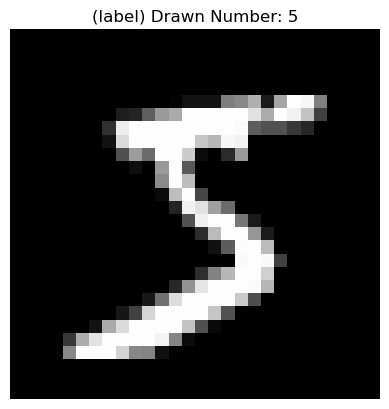

In [3]:
archive_path = './datasets/MNIST'

# File paths
train_images_path = os.path.join(archive_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
train_labels_path = os.path.join(archive_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
t10k_images_path = os.path.join(archive_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
t10k_labels_path = os.path.join(archive_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

# --- Get the data into your notebook ---
print("Loading training images...")
train_images = parse_idx_images(train_images_path)
print(f"Train images shape: (Num samples, Height, Width) -> {train_images.shape}") 

print("Loading training labels...")
train_labels = parse_idx_labels(train_labels_path)
print(f"Train labels shape: {train_labels.shape} (Num samples)") 

print("\nLoading test images...")
test_images = parse_idx_images(t10k_images_path)
print(f"Test images shape: (Num samples, Height, Width) -> {test_images.shape}")

print("Loading test labels...")
test_labels = parse_idx_labels(t10k_labels_path)
print(f"Test labels shape: {test_labels.shape} (Num samples)")

print("\nData loaded successfully into NumPy arrays!")

# --- Display an image to verify ---
plt.imshow(train_images[0], cmap='gray')
plt.title(f"(label) Drawn Number: {train_labels[0]}")
plt.axis('off')
plt.show()

The `train_images` has a shape of (60000, 28, 28) -> each image is 28x28 pixels and the set contains 60000 images

In [4]:
train_images[0].shape

(28, 28)

One single image tensor has a shape of (28, 28), which mean that image has a total node (i.e tensor values) count: $ 28 * 28 = 784 $ nodes. 

In [5]:
train_labels.shape

(60000,)

The `train_labels` has a shape of (60000,) a 1D tensor with 60000 values of [0-9] -> It contains the labels for the 60,000 train_images.
- train_labels = [5, 0, 4, ..., 5, 6, 8]
    - The first 5 in array means the first image has a 5 drawn on it, the 0 means the second image has a zero drawn on it and so forth.

### Pre-Process the Dataset

We need to pre-process the dataset so that we can pass it through our Neural Network that we will build later on.
- Process Labels: We need a `one-hot` tensor encoding of the label data.
    - The images in the dataset can have a label of value between `0-9`. So we make an array like so.
        - [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        - Whatever the image value is will have a value of 1 added to its index.
        - For Example: An image has a 3 drawn on it, its labeled data tensor will look like:
            - [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
            - Note: Indexing starts at zero.
        - Another example: An image has a 9 drawn on it, its labeled data tensor will look like:
            - [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

- Process Images: We need to turn the image into `tensor data`:
    - We downloaded the dataset from pytorch, it has the Images in type: PIL.Image.Image -> we need to convert it to tensors.
    - Note that since the images are in grey-scale values they will only have 1 color channel while an RGB image will have 3 color channels. 
        - Ex:
            <img src="./showcase_images/RGB-vs-greyscale.png" width="150px">
    - The pixel values will be between 0-255 (0 for black to 255 for white). We will `normalize` the pixel values to be between 0-1 which will greatly improve how well and how fast our NN trains.

`Process the labels.`

In [6]:
# Determine the number of classes (for MNIST, it's 10)
num_classes = 10 # -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] hand draw numbers\
# For the TRAIN labels
one_hot_train_labels = np.zeros((train_labels.size, num_classes))
one_hot_train_labels[np.arange(train_labels.size), train_labels] = 1

# For the TEST labels
one_hot_test_labels = np.zeros((test_labels.size, num_classes))
one_hot_test_labels[np.arange(test_labels.size), test_labels] = 1

In [7]:
one_hot_train_labels.shape

(60000, 10)

`one_hot_train_labels.shape` has a shape of (60000, 10), meaning that now every image now has a corresponding label that looks like [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] where the 1 index position means thats the hand-drawn number.

Test show the image and label

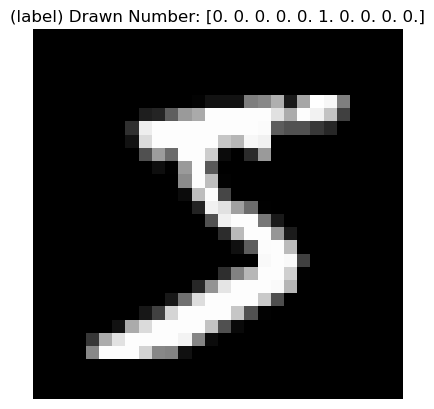

In [8]:
plt.imshow(train_images[0], cmap='gray')
plt.title(f"(label) Drawn Number: {one_hot_train_labels[0]}")
plt.axis('off')
plt.show()